## Introduction
In this project we are going to implement kNN from sctrach.
* K-nearest neigbors algorithm is a non-parametric method and also it comes under supervised learning,assumes similar things that are near to each other.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

Here, sklearn.model_selection provides train/test indices to split data in train/test sets.It split the dataset into k consecutive folds(without shuffling the data by default).Each fold is then used as test while the remaining folds form the training set.

'sklearn.neighbors' module provides unsupervised and supervised neighbors-based learning methods.

In [23]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In the count column we can see that the Unnamed:32 column is empty so we will drop this column as well as the id column as it is of no use to us.

In [24]:
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 32'],1,inplace=True)

Now we'll create design matrix X and target y

In [27]:
X=np.array(df.drop(['diagnosis'],1))
y=np.array(df['diagnosis'])

I am using boxplot to visualize the relationship between column diagnosis and other mutliple variables separately

<Figure size 432x288 with 0 Axes>

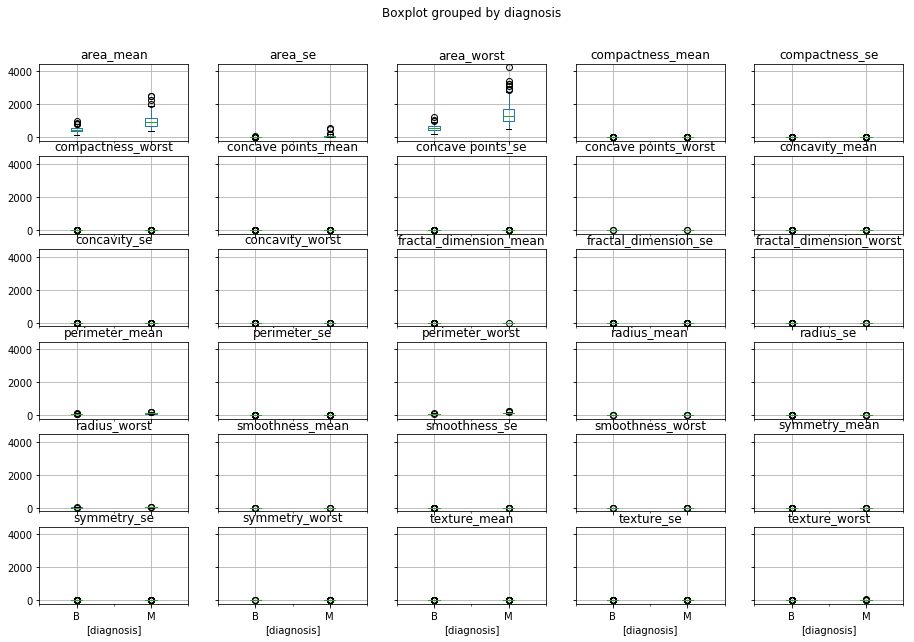

In [175]:
plt.figure()
df.boxplot(by="diagnosis",figsize=(15,10))
plt.show()

## Split the data into train and test

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.38)

So, the test set is 38% and training set is 62%

'n_neighbors' are the number of neighbors that will vote for the class of the target point.Here i have taken 9.

In [145]:
clsfr=KNeighborsClassifier(n_neighbors=9)
clsfr.fit(X_train,y_train)
accuracy=clsfr.score(X_test,y_test)*100
print('the accuracy of knn classifier is %f%%' %accuracy)

the accuracy of knn classifier is 93.548387%


Now going to perform a 10-fold cross validation on my dataset using a generated list of odd K's ranging from 1 to 100.

In [146]:
myList=list(range(0,100))
neighbors=list(filter(lambda x: x%2!=0,myList))
cv_scores=[]

In [147]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

Here I've specified the 10 folds with the cv=10 parameter and scoring metric is accuracy as this is a classification setting 

In [148]:
MSE=[1-x for x in cv_scores]

In [149]:
optimal_k=neighbors[MSE.index(min(MSE))]
print('\n The optimal number of neighbors is %d.' % optimal_k)


 The optimal number of neighbors is 3.


## Plot MSE vs K

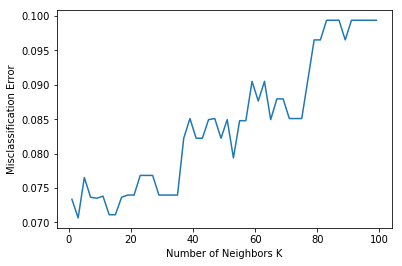

In [150]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [167]:
one=list()
new_list=list()
for x in neighbors:
    new_list.append(1/x)
cv_newscores=[]

In [168]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    newscores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_newscores.append(scores.mean())

In [172]:
new_MSE=[1-x for x in cv_newscores]

## Plot Error vs 1/K

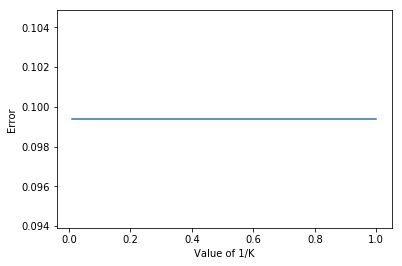

In [174]:
plt.plot(new_list,new_MSE)
plt.xlabel('Value of 1/K')
plt.ylabel('Error')
plt.show()

In [151]:
def train(X_train,y_train):
    return

In [152]:
def predict(X_train,y_train,x_test,k):
    distances=[]
    targets=[]
    
    for i in range(len(X_train)):
        distance=np.sqrt(np.sum(np.square(x_test-X_train[i, :])))
        distances.append([distance, i])
    distances=sorted(distances)
    for i in range(k):
        index=distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]

In [153]:
def kNearestNeighbor(X_train,y_train,X_test,predictions,k):
    if k>len(X_train):
        raise ValueError
    train(X_train,y_train)
    
    for i in range(len(X_test)):
        predictions.append(predict(X_train,y_train,X_train[i, :],k))


In [159]:
predictions=[]
try:
    kNearestNeighbor(X_train,y_train,X_test,predictions,7)
    predictions=np.asarray(predictions)
    accuracy=accuracy_score(y_test,predictions)*100
    print('\nThe accuracy of our classifier is %f%%' % accuracy)
except ValueError:
    print('Can\'t have more neighbors than training samples!')


The accuracy of our classifier is 56.221198%
